C:\Users\Technomaks\AppData\Local\Temp\ipykernel_12772\624208165.py:6: RuntimeWarning: invalid value encountered in log
  return x**2 - np.log(x)


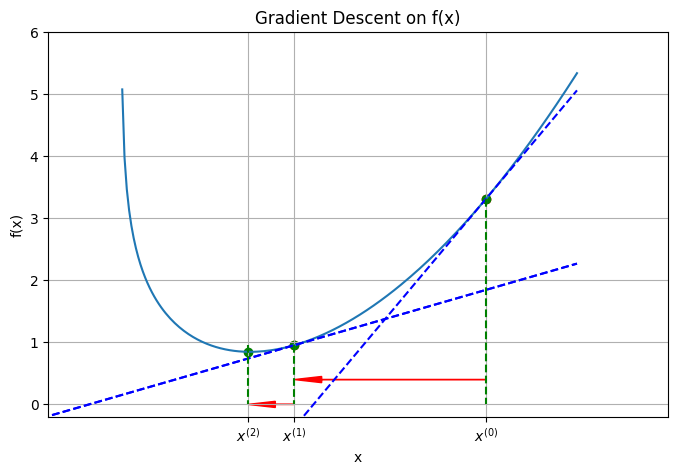

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return x**2 - np.log(x)

def df(x):
    return 2*x - 1/x

def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')


# Initial point
x0 = 2
alpha = 0.3

# Gradient descent update
x1 = x0 - alpha * df(x0)
x2 = x1 - alpha * df(x1)
# Points for the function plot
x = np.linspace(-2.5, 2.5, 400)
y = f(x)

# Tangent line at x0 (y = m*x + b)

# Creating the plot

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='f(x) = x^2')
plt.scatter([x0, x1], [f(x0), f(x1)], color='red')  # Points
m = df(x0)
b = f(x0) - m*x0
tangent_line = m*x + b
plt.plot(x, tangent_line, 'b--', label=f'Tangent at x0={x0}')
plt.arrow(x0, 0.4, x1-x0, 0.0, head_width=0.1, length_includes_head=True, color = 'r')

m = df(x1)
b = f(x1) - m*x1
tangent_line = m*x + b
plt.plot(x, tangent_line, 'b--', label=f'Tangent at x0={x1}', )
plt.ylim([-0.2,6])
plt.xlim([-0.4,3])
plt.plot(x, tangent_line, 'b--', label=f'Tangent at x0={x1}', )
m = df(x0)
b = f(x0) - m*x0
tangent_line = m*x + b

plt.scatter(x0, f(x0), color='green')  # Initial point
plt.scatter(x1, f(x1), color='green')  # Next point after step
plt.scatter(x2, f(x2), color='green')  # Next point after step

plt.arrow(x1, 0., x2-x1, 0., head_width=0.1, length_includes_head=True, color = 'r')

plt.title('Gradient Descent on f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xticks([])  # Remove x-axis ticks
plt.xticks([x0, x1, x2], [r"$x^{(0)}$", r"$x^{(1)}$", r"$x^{(2)}$"])
#plt.legend()
plt.grid(True)
plt.plot([x0, x0],[f(x0), 0],'g--')
plt.plot([x1, x1],[f(x1), 0],'g--')
plt.plot([x2, x2],[f(x1), 0],'g--')
plt.show()

In [2]:
from numpy import linalg as la

def steepest_descent(f, gradient, initial_guess, learning_rate, num_iterations = 100, epsilon_g = 1e-07):
    x = initial_guess
    for i in range(num_iterations):
        grad = gradient(x)
        x = x - learning_rate * grad
        normg = la.norm(grad)
        print(f"Iteration {i+1}: x = {x}, f(x) = {f(x)}, ||g(x)||={normg}")
        ## Termination condition
        if  normg < epsilon_g:
            break
    return x

In [3]:
def f(x):
    return np.sum((x-3.0)**2)

def gradient(x):
    return 2*(x-3.0)

steepest_descent(f, gradient, np.array([0., 0.]), 0.2)

Iteration 1: x = [1.2 1.2], f(x) = 6.479999999999999, ||g(x)||=8.48528137423857
Iteration 2: x = [1.92 1.92], f(x) = 2.3327999999999993, ||g(x)||=5.091168824543142
Iteration 3: x = [2.352 2.352], f(x) = 0.8398079999999992, ||g(x)||=3.0547012947258847
Iteration 4: x = [2.6112 2.6112], f(x) = 0.3023308799999997, ||g(x)||=1.8328207768355302
Iteration 5: x = [2.76672 2.76672], f(x) = 0.10883911679999973, ||g(x)||=1.099692466101318
Iteration 6: x = [2.860032 2.860032], f(x) = 0.039182082047999806, ||g(x)||=0.6598154796607905
Iteration 7: x = [2.9160192 2.9160192], f(x) = 0.014105549537279988, ||g(x)||=0.39588928779647375
Iteration 8: x = [2.94961152 2.94961152], f(x) = 0.005077997833420814, ||g(x)||=0.23753357267788475
Iteration 9: x = [2.96976691 2.96976691], f(x) = 0.0018280792200315037, ||g(x)||=0.1425201436067311
Iteration 10: x = [2.98186015 2.98186015], f(x) = 0.0006581085192113414, ||g(x)||=0.08551208616403891
Iteration 11: x = [2.98911609 2.98911609], f(x) = 0.00023691906691608675, 

array([2.99999998, 2.99999998])

In [ ]:
function f(x)
    sum((x.-3.0).^2)
end

function gradient(x)
    2.*(x.-3.0)
end

steepest_descent(f, gradient, [.0, .0], 0.2)

In [ ]:
using FiniteDifferences

# Create a central finite difference method with the default settings
fdm = central_fdm(5, 1)

# Calculate the gradient at a point
x0 = [1.0, 2.0]
gradient = grad(fdm, f, x0)

println("Numerical Gradient:", gradient)

In [4]:
import numpy as np
from scipy.optimize import approx_fprime


epsilon = np.sqrt(np.finfo(float).eps)  

# Point at which to calculate the gradient
x0 = np.array([1.0, 2.0])

# Calculate the gradient at the point x0
gradient = approx_fprime(x0, f, epsilon)

print("Gradient at x0:", gradient)

Gradient at x0: [-4. -2.]


In [5]:
import autograd.numpy as np   # Import wrapped NumPy
from autograd import grad    # Import the gradient function

# Create a function that returns the derivative of f
df = grad(f)

# Evaluate the derivative at x = pi
print("The derivative of f(x) at x = [0.2, 0.1] is:", df(np.array([0.2, 0.1])))

The derivative of f(x) at x = [0.2, 0.1] is: [-5.6 -5.8]


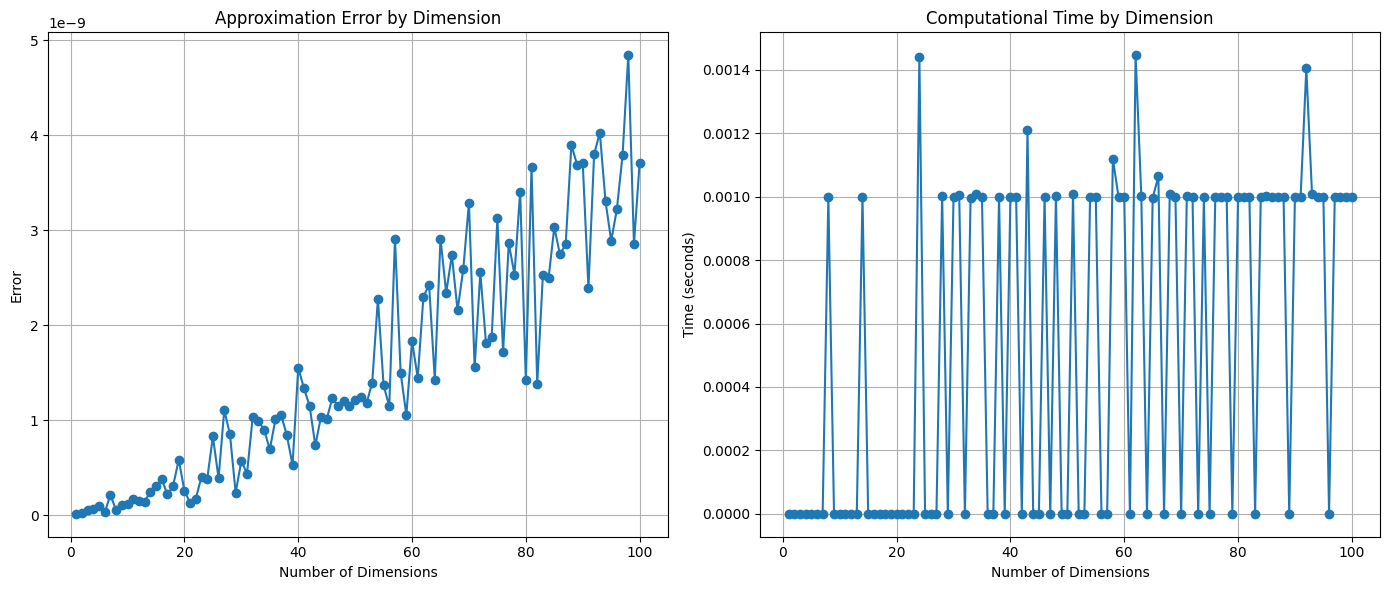

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time

def multivariate_function(x):
    """ A sample multivariate function, sum of squares plus sin of each component. """
    return np.sum(x**2 + np.sin(x))

def analytical_derivative(x):
    """ Analytical derivative of the multivariate function. """
    return 2*x + np.cos(x)

def finite_difference_derivative(f, x, h=1e-5):
    """ Compute the gradient of `f` at `x` using the central finite difference method. """
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_plus = np.copy(x)
        x_minus = np.copy(x)
        x_plus[i] += h
        x_minus[i] -= h
        grad[i] = (f(x_plus) - f(x_minus)) / (2*h)
    return grad

# Range of dimensions
dimensions = range(1, 101)
errors = []
times = []

# Loop over dimensions
for dim in dimensions:
    x = np.random.randn(dim)
    
    # Analytical derivative
    true_grad = analytical_derivative(x)
    
    # Start timing
    start_time = time.time()
    
    # Finite difference derivative
    fd_grad = finite_difference_derivative(multivariate_function, x)
    
    # End timing
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)
    
    # Error
    error = np.linalg.norm(fd_grad - true_grad)
    errors.append(error)

# Plotting error
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(dimensions, errors, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Error')
plt.title('Approximation Error by Dimension')
plt.grid(True)

# Plotting computational time
plt.subplot(1, 2, 2)
plt.plot(dimensions, times, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Time (seconds)')
plt.title('Computational Time by Dimension')
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
import numpy as np
from scipy.optimize import minimize
initial_guess = np.array([0, 0])
result = minimize(f, initial_guess, method='BFGS')

print("Optimal parameters:", result.x)
print("Minimum value:", result.fun)
print("Success:", result.success)
print("Message:", result.message)

Optimal parameters: [2.99999999 2.99999999]
Minimum value: 2.460284085377308e-16
Success: True
Message: Optimization terminated successfully.


In [8]:
from scipy.optimize import Bounds

# Define bounds (0, +Inf) for all parameters
bounds = Bounds(np.array([0., 0.]), [np.inf, np.inf])

# Run the optimization with bounds
result_with_bounds = minimize(f, initial_guess, method='L-BFGS-B', bounds=bounds)
print("Optimal parameters:", result_with_bounds.x)
print("Minimum value:", result_with_bounds.fun)
print("Success:", result_with_bounds.success)
print("Message:", result_with_bounds.message)

Optimal parameters: [3.00000044 3.00000044]
Minimum value: 3.933211619922953e-13
Success: True
Message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL


In [9]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm

def ar_likelihood(params, data, p):
    """
    Calculate the negative (unconditional) log likelihood for an AR(p) model.

    params: list of parameters, where the first p are AR coefficients and the last is the noise variance.
    data: observed data.
    p: order of the AR model.
    """
    # Extract AR coefficients and noise variance
    c = params[0]
    phi = params[1:p+1]
    sigma2 = params[-1]
        
    # Calculate residuals
    T = len(data)
    residuals = data[p:] - c - np.dot(np.column_stack([data[p-j-1:T-j-1] for j in range(p)]), phi)
    
    # Calculate negative log likelihood
    log_likelihood = (-T/2 * np.log(2 * np.pi * sigma2) - np.sum(residuals**2) / (2 * sigma2))
    
    return -log_likelihood

def estimate_ar_parameters(data, p):
    """
    Estimate AR model parameters using maximum likelihood estimation.

    data: observed data.
    p: order of the AR model.
    """
    # Initial parameter guess (random AR coefficients, variance of 1)
    params_initial = np.zeros(p+2)
    params_initial[-1] = 1.0

    ## Bounds
    bounds = [(None, None)]
    # Then p AR coefficients, each bounded between -1 and 1
    bounds += [(-1, 1) for _ in range(p)]
    # The variance parameter, bounded to be positive
    bounds += [(1e-6, None)]

    # Minimize the negative log likelihood
    result = minimize(ar_likelihood, params_initial, args=(data, p), bounds=bounds)
    
    if result.success:
        estimated_params = result.x
        return estimated_params
    else:
        raise Exception("Optimization failed:", result.message)

# Example usage
data = np.random.randn(100)  # Simulated data; replace with actual data
p = 2  # AR(2) model
params = estimate_ar_parameters(data, p)
print("Estimated parameters:", params)

Estimated parameters: [-0.14094178  0.01013248  0.03176122  0.98749066]


In [10]:
import numpy as np

def fit_ar_ols_xx(data, p):
    """
    data: observed data.
    p: order of the AR model.
    note: no constant
    """
    # Prepare the lagged data matrix
    T = len(data)
    Y = data[p:]  # Dependent variable (from p to end)
    X = np.column_stack([data[p-i-1:T-i-1] for i in range(p)])
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    # Calculate OLS estimates using the formula: beta = (X'X)^-1 X'Y
    XTX = np.dot(X.T, X)  # X'X
    XTY = np.dot(X.T, Y)  # X'Y
    beta_hat = np.linalg.solve(XTX, XTY)  # Solve (X'X)beta = X'Y
    
    return beta_hat


beta_hat = fit_ar_ols_xx(data, p)
print("Estimated AR coefficients:", beta_hat)

Estimated AR coefficients: [-0.14094299  0.01013097  0.03175969]


In [11]:
import numpy as np
from scipy import stats

def ar2_exact_loglikelihood(params, y):
    """
    Calculate the exact log-likelihood for an AR(2) model.
    
    Parameters:
    -----------
    y : array-like
        data (T x 1)
    params : tuple or list
        Model parameters (c, phi1, phi2, sigma2)
        c: constant term
        phi1: coefficient of y_{t-1}
        phi2: coefficient of y_{t-2}
        sigma2: error variance
    
    Returns:
    --------
    float
        Exact log-likelihood value
    """
    # Extract parameters
    c, phi1, phi2, sigma2 = params
    
    # Check stationarity conditions
    if not (phi2 > -1 and phi1 + phi2 < 1 and phi2 - phi1 < 1):
        return -np.inf  # Return negative infinity if not stationary
    
    T = len(y)
    
    if T < 3:
        raise ValueError("Time series must have at least 3 observations for AR(2)")
    
    # Calculate the unconditional mean of the process
    mu = c / (1 - phi1 - phi2)
    
    # Calculate autocovariances for stationary process
    gamma0 = sigma2 / (1 - phi2**2 - phi1**2)  # Variance
    gamma1 = phi1 * gamma0 / (1 - phi2)        # First-order autocovariance
    
    # Create initial variance-covariance matrix
    Sigma0 = np.array([[gamma0, gamma1], 
                        [gamma1, gamma0]])
    
    # Calculate determinant of Sigma0
    det_Sigma0 = gamma0**2 - gamma1**2
    
    # Calculate inverse of Sigma0
    if det_Sigma0 <= 0:  # Check for positive definiteness
        return -np.inf
    
    inv_Sigma0 = np.array([[gamma0, -gamma1], 
                            [-gamma1, gamma0]]) / det_Sigma0
    
    # Initial distribution contribution (Y1, Y2)
    y_init = np.array([y[0], y[1]])
    mu_init = np.array([mu, mu])
    
    diff_init = y_init - mu_init
    quad_form_init = diff_init.T @ inv_Sigma0 @ diff_init
    
    loglik_init = -np.log(2 * np.pi * np.sqrt(det_Sigma0)) - 0.5 * quad_form_init
    
    # Conditional log-likelihood contribution (Y3, ..., YT | Y1, Y2)
    residuals = np.zeros(T-2)
    for t in range(2, T):
        y_pred = c + phi1 * y[t-1] + phi2 * y[t-2]
        residuals[t-2] = y[t] - y_pred
    
    loglik_cond = -0.5 * (T-2) * np.log(2 * np.pi * sigma2) - \
                   0.5 * np.sum(residuals**2) / sigma2
    
    # Total exact log-likelihood
    exact_loglik = loglik_init + loglik_cond
    
    ## Return the negative loglik
    return -exact_loglik

In [12]:
from scipy import optimize
def fit_ar2_mle(y, initial_params=None):
    """
    Fit an AR(2) model using maximum likelihood estimation
    
    Parameters:
    -----------
    y : array-like
        Time series data
    initial_params : tuple, optional
        Initial guess for (c, phi1, phi2, sigma2)
    """
    # Set default initial parameters if not provided
    if initial_params is None:
      # Simple initial estimates
      c_init = 0.0
      phi1_init = 0
      phi2_init = 0
      sigma2_init = np.var(y)
        
      initial_params = (c_init, phi1_init, phi2_init, sigma2_init)
      # Constraints to ensure positive variance
    
    lbnds = (-np.inf, -0.99, -0.99, 1e-6)  # Lower bounds for params
    ubnds = (np.inf, 0.99, 0.99, np.inf)     # Upper bounds for params

    bnds = optimize.Bounds(lb=lbnds, ub=ubnds)
    # Optimize
    result = optimize.minimize(
        ar2_exact_loglikelihood, 
        initial_params,
        (y,),
        bounds = bnds,
        method='L-BFGS-B', 
        options={'disp': False} # set to true to get more info
    )
    
    if not result.success:
        print(f"Warning: Optimization did not converge. {result.message}")
    
    # Return parameters and maximum log-likelihood
    return result.x, result.fun


Y = np.random.normal(size=(100,))
fit_ar2_mle(Y, initial_params=None)

(array([ 0.09270916,  0.16297135, -0.03613725,  0.93535693]),
 np.float64(138.56823503032768))